Dataset sacado de: https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv

In [129]:
#Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [130]:
#Montando unidad de Google Drive y importando dataset
from google.colab import drive
drive.mount('/content/drive')
dataset_directory = '/content/drive/My Drive/MLDatasets/US-pumpkins.csv'

df = pd.read_csv(dataset_directory)
df = df[df['Package'].str.contains('bushel', case=True, regex=True)]
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1742,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [131]:
df.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [132]:
df = df[['Package', 'Low Price', 'High Price', 'Date']]
df

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,15.00,15.0,10/8/16
...,...,...,...,...
1738,1/2 bushel cartons,15.00,15.0,9/30/16
1739,1/2 bushel cartons,13.75,15.0,9/30/16
1740,1/2 bushel cartons,10.75,15.0,9/30/16
1741,1/2 bushel cartons,12.00,12.0,9/30/16


In [133]:
new_df = df.copy()
new_df['Price'] = (df['Low Price'] + df['High Price']) / 2
new_df['Month'] = pd.DatetimeIndex(new_df['Date']).month
new_df.drop('Date', axis=1, inplace=True)

new_df.loc[new_df['Package'].str.contains('1 1/9'), 'Price'] = new_df['Price'] / (10/9)
new_df.loc[new_df['Package'].str.contains('1/2'), 'Price'] = new_df['Price'] / (1/2)
new_df.head()

,Package,Low Price,High Price,Price,Month
70,1 1/9 bushel cartons,15.0,15.0,13.5,9
71,1 1/9 bushel cartons,18.0,18.0,16.2,9
72,1 1/9 bushel cartons,18.0,18.0,16.2,10
73,1 1/9 bushel cartons,17.0,17.0,15.3,10
74,1 1/9 bushel cartons,15.0,15.0,13.5,10


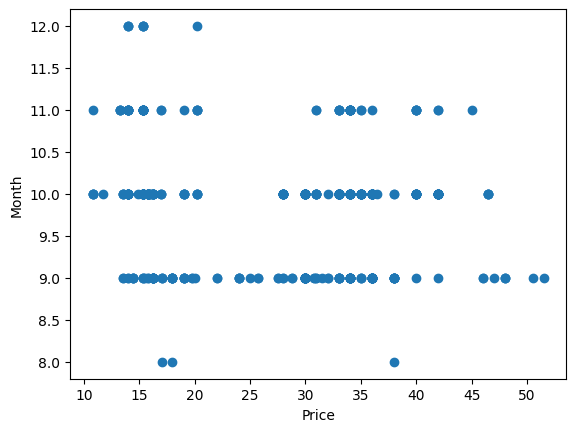

In [134]:
plt.scatter(new_df.Price, new_df.Month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.show()

Text(0, 0.5, 'Pumpkin Price')

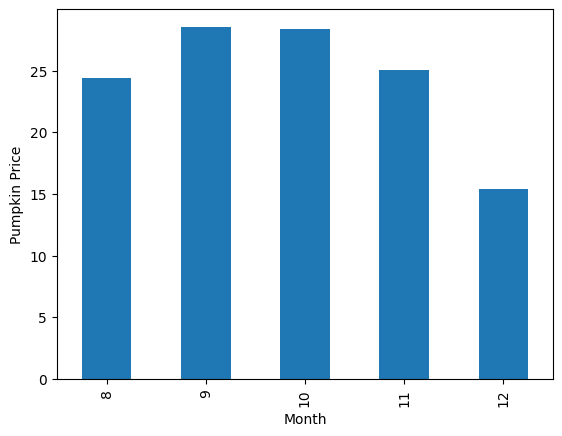

In [135]:
new_df_grouped_by_month = new_df.groupby('Month')
new_df_grouped_by_month["Price"].mean().plot(kind="bar")
plt.ylabel("Pumpkin Price")

<Axes: xlabel='Month', ylabel='Price'>

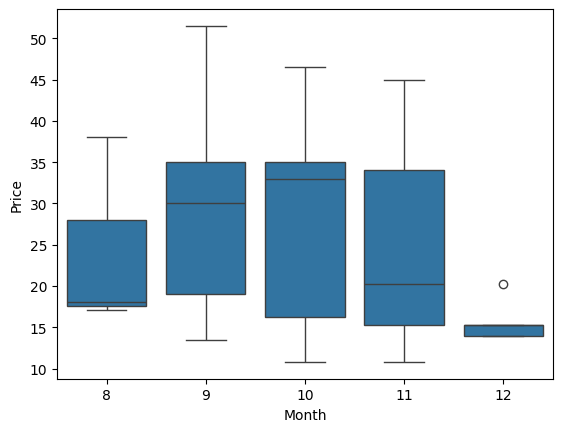

In [136]:
sns.boxplot(x=new_df['Month'], y=new_df['Price'])

<Axes: xlabel='Month', ylabel='Price'>

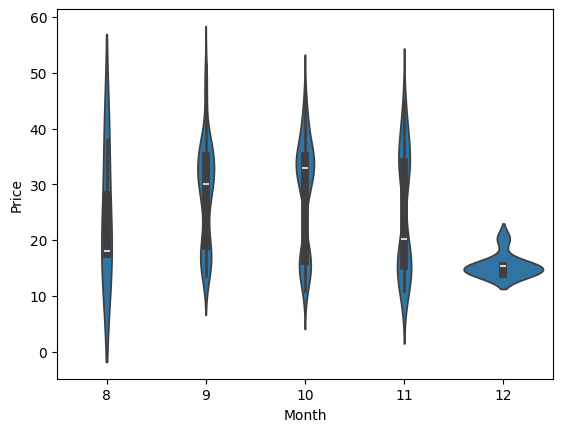

In [137]:
sns.violinplot(x=new_df['Month'], y=new_df['Price'])